# Coursera: Data Analysis Tools – Assignment 3
Intro

Variables to explore:
* Cannabis use (transformed to quantitative, see Assignment 1)
* Tobacco use (to be transformed)

Question: is there any relationship between the amount of tobacco and cannabis use?

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats

NESARC = r"C:\Users\USER\Documents\Courses\Coursera\dai\datasets\nesarc\nesarc_pds.csv"

# Load data
data = pd.read_csv(NESARC, low_memory=False)

Process variable on cannabis use to make it quantitative and possibly non-discrete.

In [6]:
### Processing variable reflecting recent cannabis use

CANNABIS_USE_12M = 'S3BD5Q2C'  # 'HOW OFTEN USED CANNABIS IN THE LAST 12 MONTHS'

# Convert values to numeric
data[CANNABIS_USE_12M] = pd.to_numeric(data[CANNABIS_USE_12M], errors='coerce')

# Code reference for CANNABIS_USE_12M
CANNABIS_USE_CAT_MAP = {
    1: "Every day",
    2: "Nearly every day",
    3: "3 to 4 times a week",
    4: "1 to 2 times a week",
    5: "2 to 3 times a month",
    6: "Once a month",
    7: "7 to 11 times a year",
    8: "3 to 6 times a year",
    9: "2 times a year",
    10: "Once a year",
    99: "Unknown",
}
# Recode meaningful NaN (to 11, N/A) and 'Unknowns' (99 to NaN)
data[CANNABIS_USE_12M] = data[CANNABIS_USE_12M].replace(np.NaN, 11).replace(99, np.NaN)
# print(data[CANNABIS_USE_12M].value_counts(sort=False, dropna=False))

# Recode values so that they reflect approximately number of times of cannabis use per last year, store in new column

CANNABIS_USE_TIMES_MAP = {
    1: [365, 366],
    2: [330, 364],
    3: [156, 208],
    4: [52, 104],
    5: [24, 36],
    6: [12, 12],
    7: [7, 11],
    8: [3, 4],
    9: [2, 2],
    10: [1, 1],
    11: [0, 0]
}

def recode_values(row):
    raw = row[CANNABIS_USE_12M]
    value_range = CANNABIS_USE_TIMES_MAP.get(raw)
    if value_range:
        return np.random.randint(value_range[0], value_range[1] + 1)

CANNABIS_USE_QUANT = 'CANNABIS_USE_QUANT'

data[CANNABIS_USE_QUANT] = data.apply(lambda row: recode_values(row), axis=1)

# print(data[CANNABIS_USE_QUANT].value_counts(sort=False, dropna=False))

TOBACCO_12M = 'CHECK321'

cannabis_condition = data[CANNABIS_USE_QUANT] > 0
tobacco_condition = data[TOBACCO_12M] == 1
cannabis_tobacco_subset = data[cannabis_condition & tobacco_condition].copy()  # 986 observations

cannabis_tobacco_subset.describe()

,Unnamed: 0,ETHRACE2A,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms,CANNABIS_USE_QUANT
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.0,986.000000,320.000000,986.000000
mean,22065.130832,1.864097,22066.130832,28469.777890,2843.781947,5402.113786,15.856998,8.690669,2001.121704,2.609533,...,0.043611,0.191684,0.570994,0.787018,0.008114,0.037525,0.0,0.014199,3.456250,126.495943
std,12271.654580,1.403328,12271.654580,15922.848422,1588.432032,3904.984385,8.841000,2.855692,0.327109,1.079890,...,0.249110,0.526237,0.883883,0.863985,0.142263,0.291350,0.0,0.168002,1.863179,149.059912
min,44.000000,1.000000,45.000000,1011.000000,101.000000,467.304244,1.000000,1.000000,2001.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,12058.250000,1.000000,12059.250000,13057.000000,1303.750000,2867.656531,8.000000,8.000000,2001.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,7.000000
50%,21932.000000,1.000000,21933.000000,29029.500000,2901.000000,4148.140240,16.000000,9.000000,2001.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,33.000000
75%,32415.750000,2.000000,32416.750000,41097.000000,4105.750000,7343.481636,24.000000,10.000000,2001.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,5.000000,337.750000
max,43090.000000,5.000000,43091.000000,56017.000000,5605.000000,37272.200480,31.000000,12.000000,2002.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,3.000000,7.000000,366.000000


Create quantitative variable based on tobacco use (using calculations from the course example).

In [17]:
# recoding values for S3AQ3B1 into a new variable, USFREQMO, showing smoking day rate per month
recode_map2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}

CIG_FREQUENCY = 'S3AQ3B1'  # USUAL FREQUENCY WHEN SMOKED CIGARETTES
CIG_FREQUENCY_MONTH = 'CIG_FREQUENCY_MONTH'
CIG_NUM_DAY = 'CIG_NUM_DAY'
CIG_NUM_YEAR = 'CIG_NUM_YEAR'
CIG_QUANTITY = 'S3AQ3C1'  # USUAL QUANTITY WHEN SMOKED CIGARETTES

cannabis_tobacco_subset2 = cannabis_tobacco_subset.copy()

cannabis_tobacco_subset2[CIG_FREQUENCY_MONTH] = cannabis_tobacco_subset2[CIG_FREQUENCY].map(recode_map2)

# secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
cannabis_tobacco_subset2[CIG_NUM_DAY] = cannabis_tobacco_subset2[CIG_FREQUENCY_MONTH] * cannabis_tobacco_subset2[CIG_QUANTITY]
cannabis_tobacco_subset2[CIG_NUM_DAY] = pd.to_numeric(cannabis_tobacco_subset2[CIG_NUM_DAY], errors='coerce')
cannabis_tobacco_subset2[CANNABIS_USE_QUANT] = pd.to_numeric(cannabis_tobacco_subset2[CANNABIS_USE_QUANT], errors='coerce')


Visualize with a scatterplot.

Text(0.5, 1.0, 'Scatterplot for the Association Between Tobacco and Cannabis Use')

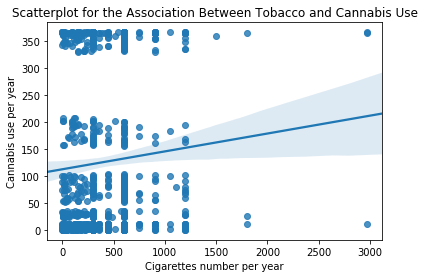

In [18]:
scatplot = seaborn.regplot(x=CIG_NUM_DAY, y=CANNABIS_USE_QUANT, fit_reg=True, data=cannabis_tobacco_subset2)
plt.xlabel('Cigarettes number per year')
plt.ylabel('Cannabis use per year')
plt.title('Scatterplot for the Association Between Tobacco and Cannabis Use')

Looks like scatterplot is still not quite appropriate to show the associasion between these quasi-continuous values.

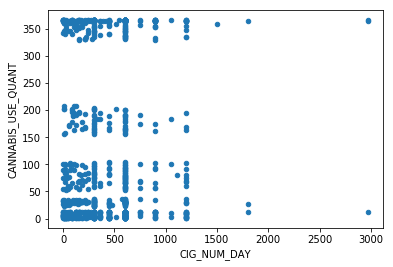

In [20]:
cannabis_tobacco_subset2.plot.scatter(CIG_NUM_DAY, CANNABIS_USE_QUANT)  # Yet another way to create this useless scatterplot

Some variables regarding tobacco use
```
CHECK321 CIGARETTE SMOKING STATUS
9913 1. Smoked cigarettes in the past 12 months
8078 2. Smoked cigarettes prior to the last 12 months
22 9. Unknown
25080 BL. NA, never or unknown if ever smoked 100+ cigarettes

S3AQ3B1 USUAL FREQUENCY WHEN SMOKED CIGARETTES
14836 1. Every day
460 2. 5 to 6 Day(s) a week
687 3. 3 to 4 Day(s) a week
747 4. 1 to 2 Day(s) a week
409 5. 2 to 3 Day(s) a month
772 6. Once a month or less
102 9. Unknown
25080 BL. NA, never or unknown if ever smoked 100+ cigarettes


S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
17751 1-98. Cigarette(s)
262 99. Unknown
25080 BL. NA, never or unknown if ever smoked 100+ cigarettes```